In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
dataset = pd.read_csv('BostonHousing.csv')

In [111]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [112]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [114]:
x = dataset.drop(['medv'],axis=1)
y = dataset['medv']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=45)

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [151]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [147]:
result = dtr.predict(x_test)

In [148]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, result)

16.354802631578945

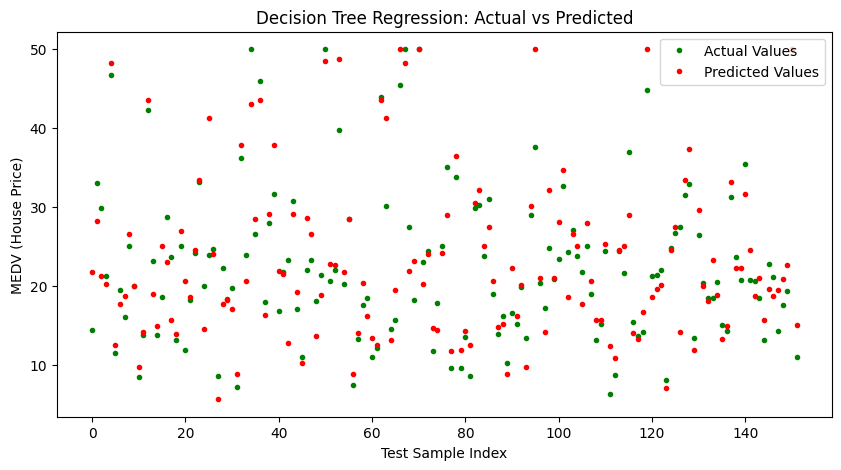

In [149]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, '.', color='green', label="Actual Values")
plt.plot(result, '.', color='red', label="Predicted Values")
plt.xlabel("Test Sample Index")
plt.ylabel("MEDV (House Price)")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [150]:
dtr.score(x_test,y_test)

0.8306716836590975

In [169]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=600)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=600)

In [170]:
rf_result = rf_model.predict(x_test)

In [171]:
mean_squared_error(y_test,rf_result)

10.904067146747142

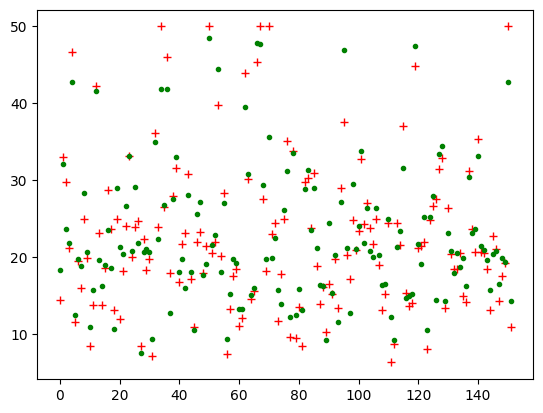

In [172]:
plt.plot(y_test.values,'+', color='red')
plt.plot(rf_result,'.', color='green')

In [174]:
mean_squared_error(result,rf_result)

9.088555523940078